In [1]:
import numpy as np
from sklearn.metrics import jaccard_score
from scipy.cluster.hierarchy import linkage, to_tree
from Bio import Phylo
import pandas as pd
import allel
import matplotlib.pyplot as plt
import io
from Bio.Phylo.BaseTree import Clade
from Bio.Phylo.BaseTree import Tree


In [14]:


def vcf_a_matriz_binaria(archivo_vcf):
    # Leemos el archivo VCF con scikit-allel
    callset = allel.read_vcf(archivo_vcf, fields='*')

    # Extraemos los genotipos
    gt = allel.GenotypeArray(callset['calldata/GT'])

    # Convertimos los genotipos a una matriz binaria
    matriz_binaria = gt.to_n_alt()

    # Convertimos la matriz binaria a un DataFrame de pandas
    df = pd.DataFrame(matriz_binaria)

    return df

archivo_vcf = "efectores_filtrados_agronom_multisample.vcf"
matriz_binaria = vcf_a_matriz_binaria(archivo_vcf)

print(matriz_binaria)

     0   1   2   3   4   5   6   7   8   9   10  11  12
0     0   1   0   0   0   1   0   0   0   0   0   0   0
1     0   0   0   0   0   0   0   0   0   0   0   2   0
2     0   0   0   0   0   0   0   0   0   0   0   2   0
3     0   0   0   0   0   0   0   0   0   0   0   2   0
4     0   1   1   1   2   1   1   1   1   1   1   0   1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
386   2   1   1   2   1   1   1   1   1   1   1   0   2
387   0   0   1   0   0   0   0   0   0   1   0   0   0
388   1   1   1   1   1   1   1   1   1   1   1   0   2
389   1   0   1   2   1   0   1   1   0   1   1   0   2
390   0   0   0   0   0   0   0   0   0   0   0   2   0

[391 rows x 13 columns]


C:\Users\Marce\anaconda3\Lib\site-packages\allel\io\vcf_read.py:1732: UserWarning: invalid INFO header: '##INFO=<ID=VDB,Number=1,Type=Float,Description="Variant Distance Bias for filtering splice-site artefacts in RNA-seq data (bigger is better)",Version="3">\n'
  warnings.warn('invalid INFO header: %r' % header)
C:\Users\Marce\anaconda3\Lib\site-packages\allel\io\vcf_read.py:322: UserWarning: error parsing integer value; field: CALLDATA; variant: 0 (Supercontig_1.1 :2168); sample: 2:7 (ERR248796_F12_rmdup.bam:AD)
  chunks = [d[0] for d in it]
C:\Users\Marce\anaconda3\Lib\site-packages\allel\io\vcf_read.py:322: UserWarning: error parsing integer value; field: CALLDATA; variant: 0 (Supercontig_1.1 :2168); sample: 3:7 (ERR248814_F12_rmdup.bam:AD)
  chunks = [d[0] for d in it]
C:\Users\Marce\anaconda3\Lib\site-packages\allel\io\vcf_read.py:322: UserWarning: error parsing integer value; field: CALLDATA; variant: 0 (Supercontig_1.1 :2168); sample: 4:7 (ERR299556_F12_rmdup.bam:AD)
  chunks =

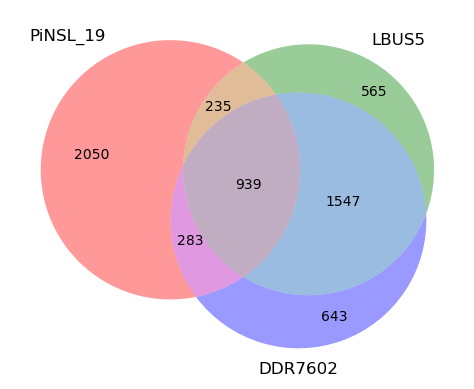

In [38]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3


nombres_muestras = ["Blue13", "Eg_73", "P13626", "LBUS5", "US-8", "US-23", "HN1602", "KR1", "Kr2_A2", "PiNSL_19", "HB1501", "P_mirabilis", "DDR7602"]
# Agregamos los nombres de las muestras a la matriz binaria
matriz_binaria.columns = nombres_muestras


def comparar_muestras(muestra1, muestra2, muestra3):
    # Obtenemos los datos de las muestras
    datos_muestra1 = matriz_binaria[muestra1]
    datos_muestra2 = matriz_binaria[muestra2]
    datos_muestra3 = matriz_binaria[muestra3]

    # Contamos las coincidencias y diferencias
    solo_muestra1 = (datos_muestra1 & ~datos_muestra2 & ~datos_muestra3).sum()
    solo_muestra2 = (~datos_muestra1 & datos_muestra2 & ~datos_muestra3).sum()
    solo_muestra3 = (~datos_muestra1 & ~datos_muestra2 & datos_muestra3).sum()
    coincidencias_12 = (datos_muestra1 & datos_muestra2 & ~datos_muestra3).sum()
    coincidencias_13 = (datos_muestra1 & ~datos_muestra2 & datos_muestra3).sum()
    coincidencias_23 = (~datos_muestra1 & datos_muestra2 & datos_muestra3).sum()
    coincidencias_123 = (datos_muestra1 & datos_muestra2 & datos_muestra3).sum()

    # Creamos el diagrama de Venn
    venn3(subsets=(solo_muestra1, solo_muestra2, coincidencias_12, solo_muestra3, coincidencias_13, coincidencias_23, coincidencias_123),
          set_labels=(muestra1, muestra2, muestra3))
    plt.show()

# Ejemplo de uso
comparar_muestras('PiNSL_19', 'LBUS5', 'DDR7602')

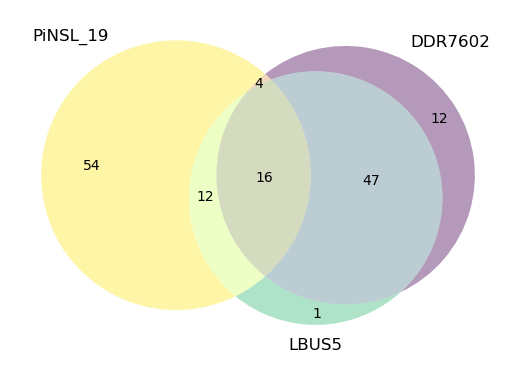

In [18]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

nombres_muestras = ["Blue13", "Eg_73", "P13626", "LBUS5", "US-8", "US-23", "HN1602", "KR1", "Kr2_A2", "PiNSL_19", "HB1501", "P_mirabilis", "DDR7602"]
# Agregamos los nombres de las muestras a la matriz binaria
matriz_binaria.columns = nombres_muestras

def comparar_muestras(muestra1, muestra2, muestra3):
    # Obtenemos los datos de las muestras
    datos_muestra1 = matriz_binaria[muestra1]
    datos_muestra2 = matriz_binaria[muestra2]
    datos_muestra3 = matriz_binaria[muestra3]

    # Contamos las coincidencias y diferencias
    solo_muestra1 = (datos_muestra1 & ~datos_muestra2 & ~datos_muestra3).sum()
    solo_muestra2 = (~datos_muestra1 & datos_muestra2 & ~datos_muestra3).sum()
    solo_muestra3 = (~datos_muestra1 & ~datos_muestra2 & datos_muestra3).sum()
    coincidencias_12 = (datos_muestra1 & datos_muestra2 & ~datos_muestra3).sum()
    coincidencias_13 = (datos_muestra1 & ~datos_muestra2 & datos_muestra3).sum()
    coincidencias_23 = (~datos_muestra1 & datos_muestra2 & datos_muestra3).sum()
    coincidencias_123 = (datos_muestra1 & datos_muestra2 & datos_muestra3).sum()

    # Creamos el diagrama de Venn con los colores especificados
    venn3(subsets=(solo_muestra1, solo_muestra2, coincidencias_12, solo_muestra3, coincidencias_13, coincidencias_23, coincidencias_123),
          set_labels=(muestra1, muestra2, muestra3),
          set_colors=('#fde725', '#440154', '#35b779', '#21918c', '#31688e', '#443983', '#90d743'))  # Colores especificados
    plt.show()

# Ejemplo de uso
comparar_muestras('PiNSL_19', 'DDR7602', 'LBUS5')

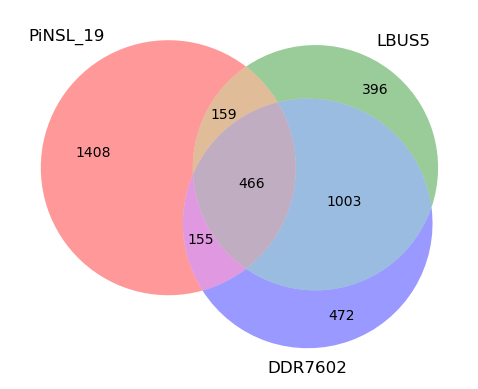

In [9]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

nombres_muestras = ["Blue13", "Eg_73", "P13626", "LBUS5", "US-8", "US-23", "HN1602", "Kr1", "Kr2", "PiNSL_19", "HB1501", "P_mirabilis", "DDR7602"]
# Agregamos los nombres de las muestras a la matriz binaria
matriz_binaria.columns = nombres_muestras

# Filtramos la matriz binaria para excluir las posiciones que sólo en "P_mirabilis" tengan valores distintos de 0
matriz_binaria = matriz_binaria[~(matriz_binaria["P_mirabilis"] > 0)]

def comparar_muestras(muestra1, muestra2, muestra3):
    # Obtenemos los datos de las muestras
    datos_muestra1 = matriz_binaria[muestra1]
    datos_muestra2 = matriz_binaria[muestra2]
    datos_muestra3 = matriz_binaria[muestra3]

    # Contamos las coincidencias y diferencias
    solo_muestra1 = (datos_muestra1 & ~datos_muestra2 & ~datos_muestra3).sum()
    solo_muestra2 = (~datos_muestra1 & datos_muestra2 & ~datos_muestra3).sum()
    solo_muestra3 = (~datos_muestra1 & ~datos_muestra2 & datos_muestra3).sum()
    coincidencias_12 = (datos_muestra1 & datos_muestra2 & ~datos_muestra3).sum()
    coincidencias_13 = (datos_muestra1 & ~datos_muestra2 & datos_muestra3).sum()
    coincidencias_23 = (~datos_muestra1 & datos_muestra2 & datos_muestra3).sum()
    coincidencias_123 = (datos_muestra1 & datos_muestra2 & datos_muestra3).sum()

    # Creamos el diagrama de Venn
    venn3(subsets=(solo_muestra1, solo_muestra2, coincidencias_12, solo_muestra3, coincidencias_13, coincidencias_23, coincidencias_123),
          set_labels=(muestra1, muestra2, muestra3))
    plt.show()

# Ejemplo de uso
comparar_muestras('PiNSL_19', 'LBUS5', 'DDR7602')

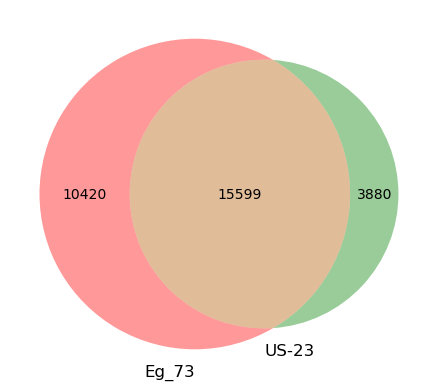

In [8]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

nombres_muestras = ["Blue13", "Eg_73", "P13626", "LBUS5", "US-8", "US-23", "HN1602", "KR1", "Kr2_A2", "PiNSL_19", "HB1501", "P_mirabilis", "DDR7602"]
# Agregamos los nombres de las muestras a la matriz binaria
matriz_binaria.columns = nombres_muestras

def comparar_muestras(muestra1, muestra2):
    # Obtenemos los datos de las muestras
    datos_muestra1 = matriz_binaria[muestra1]
    datos_muestra2 = matriz_binaria[muestra2]

    # Contamos las coincidencias y diferencias
    coincidencias = (datos_muestra1 & datos_muestra2).sum()
    solo_muestra1 = (datos_muestra1 & ~datos_muestra2).sum()
    solo_muestra2 = (~datos_muestra1 & datos_muestra2).sum()

    # Creamos el diagrama de Venn
    venn2(subsets=(solo_muestra1, solo_muestra2, coincidencias),
          set_labels=(muestra1, muestra2))
    plt.show()

# Ejemplo de uso
comparar_muestras('Eg_73', 'US-23')

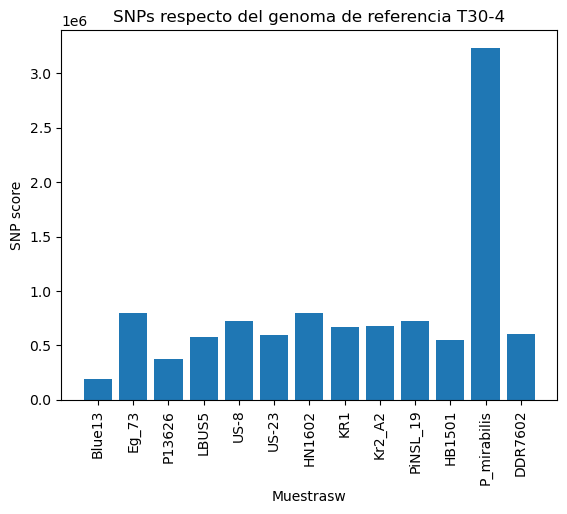

In [25]:
# Reemplaza los 0s en la matriz con NaNs para que no se incluyan en la suma
matriz_binaria = np.where(matriz_binaria==0, np.nan, matriz_binaria)

# Calcula la suma de cada columna
suma_columnas = np.nansum(matriz_binaria, axis=0)

# Aquí están los nombres de tus muestras
nombres_muestras = ["Blue13", "Eg_73", "P13626", "LBUS5", "US-8", "US-23", "HN1602", "KR1", "Kr2_A2", "PiNSL_19", "HB1501", "P_mirabilis", "DDR7602"]

# Crea el gráfico de barras
plt.bar(nombres_muestras, suma_columnas)

# Rota los nombres de las columnas para que se muestren verticalmente
plt.xticks(rotation='vertical')

plt.xlabel('Muestrasw')
plt.ylabel('SNP score')
plt.title('SNPs respecto del genoma de referencia T30-4')
plt.show()

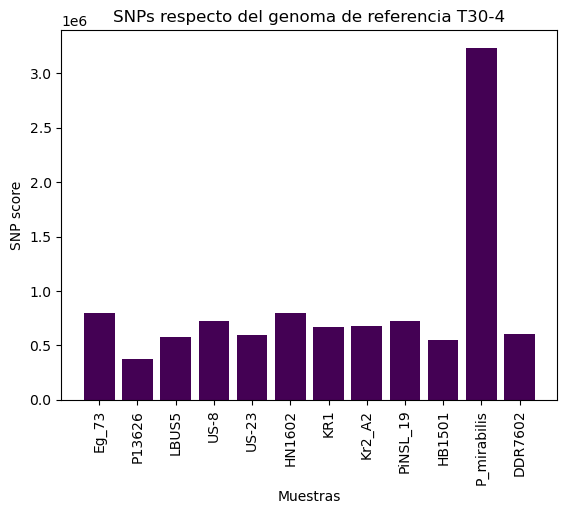

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Excluir la muestra "Blue13" y su valor de la suma de columnas
nombres_muestras = ["Eg_73", "P13626", "LBUS5", "US-8", "US-23", "HN1602", "KR1", "Kr2_A2", "PiNSL_19", "HB1501", "P_mirabilis", "DDR7602"]

# Excluir "Blue13" del array de suma_columnas (asumiendo que está en la primera posición)
suma_columnas = np.delete(suma_columnas, 0)  # Eliminar la columna correspondiente a "Blue13"

# Crear una lista de colores, con el color violeta para todas las barras
colores = ["#440154FF" for _ in range(len(nombres_muestras))]

# Crea el gráfico de barras
plt.bar(nombres_muestras, suma_columnas, color=colores)

# Rota los nombres de las columnas para que se muestren verticalmente
plt.xticks(rotation='vertical')

plt.xlabel('Muestras')
plt.ylabel('SNP score')
plt.title('SNPs respecto del genoma de referencia T30-4')

# Guardar el gráfico como PNG antes de mostrarlo
plt.savefig("snp_sum_muestras.png", format="png", dpi=300, bbox_inches="tight")

# Mostrar el gráfico
plt.show()



In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Lista original de nombres de muestras, incluyendo "Blue13"
nombres_muestras = ["Blue13", "Eg_73", "P13626", "LBUS5", "US-8", "US-23", "HN1602", "KR1", "Kr2_A2", "PiNSL_19", "HB1501", "DDR7602", "P_mirabilis"]

# Excluir "Blue13" del array de suma_columnas (asumiendo que está en la primera posición)
suma_columnas = np.delete(suma_columnas, 0)  # Eliminar el valor de "Blue13"

# Asegurarse de que "Blue13" está en la lista antes de eliminarlo
if "Blue13" in nombres_muestras:
    nombres_muestras.remove("Blue13")  # Eliminar "Blue13" de nombres_muestras

# Mover el valor de "P_mirabilis" al final
index_p_mirabilis = nombres_muestras.index("P_mirabilis")  # Obtener índice de "P_mirabilis"
valor_p_mirabilis = suma_columnas[index_p_mirabilis]  # Obtener el valor correspondiente

# Eliminar el valor de "P_mirabilis" de su posición original
suma_columnas = np.delete(suma_columnas, index_p_mirabilis)

# Añadir el valor de "P_mirabilis" al final
suma_columnas = np.append(suma_columnas, valor_p_mirabilis)

# Mover "P_mirabilis" al final en nombres_muestras
nombres_muestras.append(nombres_muestras.pop(index_p_mirabilis))

# Crear una lista de colores, asignando un color especial para "P_mirabilis"
colores = ["#440154FF" for _ in range(len(nombres_muestras) - 1)] + ["#FDE725FF"]

# Crea el gráfico de barras
plt.bar(nombres_muestras, suma_columnas, color=colores)

# Rota los nombres de las columnas para que se muestren verticalmente
plt.xticks(rotation='vertical')

plt.xlabel('Muestras')
plt.ylabel('SNP score')
plt.title('SNPs respecto del genoma de referencia T30-4')
plt.show()


IndexError: index 11 is out of bounds for axis 0 with size 9

In [7]:
nombres_muestras = ["Blue13", "Eg_73", "P13626", "LBUS5", "US-8", "US-23", "HN1602", "KR1", "Kr2_A2", "PiNSL_19", "HB1501", "P_mirabilis", "DDR7602"]
# Agregamos los nombres de las muestras a la matriz binaria
matriz_binaria.columns = nombres_muestras

# Supongamos que ya tienes un DataFrame llamado "df"
# y quieres eliminar la columna "P_mirabilis"
column_to_remove = "P_mirabilis"
data_no_og = matriz_binaria.drop(columns=[column_to_remove])

# Supongamos que ya tienes un DataFrame llamado "data_no_og"
# y quieres eliminar las filas duplicadas
data_final = data_no_og[(data_no_og != 0).any(axis=1)]

print(data_final)

         Blue13  Eg_73  P13626  LBUS5  US-8  US-23  HN1602  KR1  Kr2_A2  \
0             0      1       0      0     0      1       0    0       0   
1             0      1       0      0     0      0       0    0       0   
2             0      1       0      0     0      0       0    0       0   
3             0      0       0      0     2      0       2    0       0   
5             0      1       0      0     0      0       0    0       0   
...         ...    ...     ...    ...   ...    ...     ...  ...     ...   
3038723       0      0       0      0     0      0       0    0       0   
3038724       0      0       0      0     0      0       0    0       0   
3038725       0      0       0      0     0      0       0    0       0   
3038726       0      0       0      0     0      0       0    0       0   
3038727       0      0       0      0     0      0       0    0       0   

         PiNSL_19  HB1501  DDR7602  
0               0       0        0  
1               0       0

In [44]:
# Lee el archivo "efectores.txt" en un DataFrame
df_efectores = pd.read_csv("efectores_agronom.txt", sep="\t")

# Muestra las primeras filas del DataFrame
print(df_efectores.head())

df = pd.read_csv('multisample.vcf', sep='\t', comment='#')



# Crear un DataFrame vacío para almacenar las filas filtradas
df_filtrado = pd.DataFrame(columns=df.columns)

# Iterar sobre las filas de df
for index, row in df.iterrows():
    # Obtener los valores de las columnas relevantes
    chrom_df = row.iloc[0]  # Usamos iloc para acceder por posición
    pos_df = row.iloc[1]

    # Filtrar las filas de df_efectores
    filtro_efectores = (df_efectores['contig'] == chrom_df) & (df_efectores['START'] < pos_df) & (df_efectores['END'] > pos_df)
    filas_filtradas = df_efectores[filtro_efectores]

    # Si hay filas filtradas, agregarlas al DataFrame df_filtrado
    if not filas_filtradas.empty:
        df_filtrado = pd.concat([df_filtrado, row.to_frame().T])


print(df_filtrado)

      Gene_ID            contig    START      END
0  PITG_08943  Supercontig_1.16  1901141  1901491
1  PITG_11484  Supercontig_1.23  2018588  2018995
2  PITG_04090   Supercontig_1.5   762797   763099
3  PITG_09173  Supercontig_1.14  1078166  1078543
4  PITG_02860   Supercontig_1.3  4440966  4441373
           Supercontig_1.1     2168  .  T  C    143  PASS  \
332580     Supercontig_1.3  4441043  .  G  T   59.0  PASS   
332581     Supercontig_1.3  4441061  .  T  C  199.0  PASS   
332582     Supercontig_1.3  4441067  .  C  T  214.0  PASS   
332583     Supercontig_1.3  4441079  .  A  G  225.0  PASS   
332584     Supercontig_1.3  4441231  .  C  T   67.0  PASS   
...                    ...      ... .. .. ..    ...   ...   
2891431  Supercontig_1.302    59886  .  G  T  225.0  PASS   
2891432  Supercontig_1.302    59903  .  C  T  163.0  PASS   
2891433  Supercontig_1.302    59922  .  C  G  212.0  PASS   
2891434  Supercontig_1.302    59950  .  A  C  139.0  PASS   
2891435  Supercontig_1.302   

In [45]:
vcf_original = 'multisample.vcf'
df_filtrado.to_csv('efectores_filtrado_temp.vcf', sep='\t', index=False)

# Abrir el archivo original VCF y leer las primeras 4964 líneas (metadatos)
with open(vcf_original, 'r') as f:
    metadatos = [next(f) for _ in range(4964)]

# Abrir el archivo filtrado VCF en modo escritura y añadir las líneas de metadatos
with open('efectores_filtrado_temp.vcf', 'r') as f_in:
    with open('efectores_filtrados_agronom_multisample.vcf', 'w') as f_out:
        for linea in metadatos:
            f_out.write(linea)
        for linea in f_in:
            f_out.write(linea)

# Eliminar el archivo temporal
import os
os.remove('efectores_filtrado_temp.vcf')

In [27]:
def vcf_a_matriz_binaria(archivo_vcf):
    # Leemos el archivo VCF con scikit-allel
    callset = allel.read_vcf(archivo_vcf, fields='*')

    # Extraemos los genotipos
    gt = allel.GenotypeArray(callset['calldata/GT'])

    # Convertimos los genotipos a una matriz binaria
    matriz_binaria = gt.to_n_alt()

    # Convertimos la matriz binaria a un DataFrame de pandas
    df = pd.DataFrame(matriz_binaria)

    return df

archivo_vcf = df_filtrado

matriz_binaria = vcf_a_matriz_binaria(archivo_vcf)

print(matriz_binaria)

ValueError: path must be string or file-like, found                 contig      pos brr REF ALT     DP  COND  \
174    Supercontig_1.4  2220387   .   C   T  225.0  PASS   
757    Supercontig_1.5  1202019   .   G   A   90.0  PASS   
909   Supercontig_1.51   709669   .   A   G  228.0  PASS   
1034  Supercontig_1.21  1258529   .   G   T   72.0  PASS   
1036   Supercontig_1.5   570509   .   T   A  225.0  PASS   
...                ...      ...  ..  ..  ..    ...   ...   
8984  Supercontig_1.27   661740   .   C   T  228.0  PASS   
9511  Supercontig_1.21  2115971   .   T   C  192.0  PASS   
9555  Supercontig_1.30   995881   .   T   C  225.0  PASS   
9562   Supercontig_1.2  1294719   .   T   C  225.0  PASS   
9864  Supercontig_1.11  1789544   .   C   T  147.0  PASS   

                                                      A  \
174   VDB=0.140918;SGB=-0.693145;MQSB=1;MQ0F=0;MQ=60...   
757   VDB=0.107244;SGB=-0.683931;MQSB=1;MQ0F=0;MQ=60...   
909   VDB=0.42498;SGB=-0.693143;MQSB=0.488973;MQ0F=0...   
1034  VDB=0.532765;SGB=-0.616816;MQSB=0.0559863;MQ0F...   
1036  VDB=0.534313;SGB=-0.692562;MQSB=1;MQ0F=0;MQ=60...   
...                                                 ...   
8984  VDB=0.706386;SGB=-0.692976;MQSB=0.150124;MQ0F=...   
9511  VDB=0.147666;SGB=-0.693021;MQSB=0.998591;MQ0F=...   
9555  VDB=0.0702288;SGB=-0.680642;MQSB=0.982603;MQ0F...   
9562  VDB=0.352747;SGB=-0.693021;MQSB=1;MQ0F=0;MQ=60...   
9864  VDB=0.257426;SGB=-0.69168;MQSB=1;MQ0F=0;MQ=60;...   

                               B                                  Blue13  ...  \
174   GT:PL:DP:SP:DP4:ADF:ADR:AD                       ./.:.:.:.:.:.:.:.  ...   
757   GT:PL:DP:SP:DP4:ADF:ADR:AD                       ./.:.:.:.:.:.:.:.  ...   
909   GT:PL:DP:SP:DP4:ADF:ADR:AD                       ./.:.:.:.:.:.:.:.  ...   
1034  GT:PL:DP:SP:DP4:ADF:ADR:AD                       ./.:.:.:.:.:.:.:.  ...   
1036  GT:PL:DP:SP:DP4:ADF:ADR:AD                       ./.:.:.:.:.:.:.:.  ...   
...                          ...                                     ...  ...   
8984  GT:PL:DP:SP:DP4:ADF:ADR:AD                       ./.:.:.:.:.:.:.:.  ...   
9511  GT:PL:DP:SP:DP4:ADF:ADR:AD                       ./.:.:.:.:.:.:.:.  ...   
9555  GT:PL:DP:SP:DP4:ADF:ADR:AD  1/1:218,36,0:12:0:0,0,6,6:0,6:0,6:0,12  ...   
9562  GT:PL:DP:SP:DP4:ADF:ADR:AD                       ./.:.:.:.:.:.:.:.  ...   
9864  GT:PL:DP:SP:DP4:ADF:ADR:AD                       ./.:.:.:.:.:.:.:.  ...   

                                          LBUS5  \
174                           ./.:.:.:.:.:.:.:.   
757                           ./.:.:.:.:.:.:.:.   
909                           ./.:.:.:.:.:.:.:.   
1034                          ./.:.:.:.:.:.:.:.   
1036                          ./.:.:.:.:.:.:.:.   
...                                         ...   
8984                          ./.:.:.:.:.:.:.:.   
9511                          ./.:.:.:.:.:.:.:.   
9555  0/1:174,0,128:25:4:5,2,8,10:5,8:2,10:7,18   
9562                          ./.:.:.:.:.:.:.:.   
9864                          ./.:.:.:.:.:.:.:.   

                                           US8  \
174                          ./.:.:.:.:.:.:.:.   
757                          ./.:.:.:.:.:.:.:.   
909                          ./.:.:.:.:.:.:.:.   
1034    0/1:105,0,78:10:23:4,0,0,6:4,0:0,6:4,6   
1036                         ./.:.:.:.:.:.:.:.   
...                                        ...   
8984                         ./.:.:.:.:.:.:.:.   
9511                         ./.:.:.:.:.:.:.:.   
9555  1/1:238,66,0:22:0:0,0,9,13:0,9:0,13:0,22   
9562                         ./.:.:.:.:.:.:.:.   
9864                         ./.:.:.:.:.:.:.:.   

                                             US23  \
174                             ./.:.:.:.:.:.:.:.   
757                             ./.:.:.:.:.:.:.:.   
909                             ./.:.:.:.:.:.:.:.   
1034                            ./.:.:.:.:.:.:.:.   
1036                            ./.:.:.:.:.:.:.:.   
...                                           ...   
8984       1/1:171,21,0:16:0:2,1,8,5:2,8:1,5:3,13   
9511                            ./.:.:.:.:.:.:.:.   
9555  0/1:188,0,103:30:0:3,3,10,14:3,10:3,14:6,24   
9562                            ./.:.:.:.:.:.:.:.   
9864                            ./.:.:.:.:.:.:.:.   

                                           HN1602  \
174                             ./.:.:.:.:.:.:.:.   
757                             ./.:.:.:.:.:.:.:.   
909                             ./.:.:.:.:.:.:.:.   
1034                            ./.:.:.:.:.:.:.:.   
1036                            ./.:.:.:.:.:.:.:.   
...                                           ...   
8984  1/1:255,143,0:67:2:1,3,30,33:1,30:3,33:4,63   
9511                            ./.:.:.:.:.:.:.:.   
9555  1/1:242,187,0:62:0:0,0,33,29:0,33:0,29:0,62   
9562                            ./.:.:.:.:.:.:.:.   
9864                            ./.:.:.:.:.:.:.:.   

                                             Kr1  \
174                            ./.:.:.:.:.:.:.:.   
757                            ./.:.:.:.:.:.:.:.   
909                            ./.:.:.:.:.:.:.:.   
1034                           ./.:.:.:.:.:.:.:.   
1036                           ./.:.:.:.:.:.:.:.   
...                                          ...   
8984     0/1:66,0,107:15:10:5,5,5,0:5,5:5,0:10,5   
9511                           ./.:.:.:.:.:.:.:.   
9555  1/1:240,84,0:28:0:0,0,11,17:0,11:0,17:0,28   
9562                           ./.:.:.:.:.:.:.:.   
9864                           ./.:.:.:.:.:.:.:.   

                                             Kr2  \
174                            ./.:.:.:.:.:.:.:.   
757                            ./.:.:.:.:.:.:.:.   
909                            ./.:.:.:.:.:.:.:.   
1034                           ./.:.:.:.:.:.:.:.   
1036                           ./.:.:.:.:.:.:.:.   
...                                          ...   
8984        1/1:106,9,0:10:7:0,3,4,3:0,4:3,3:3,7   
9511                           ./.:.:.:.:.:.:.:.   
9555  1/1:234,93,0:32:0:0,0,13,19:0,13:0,18:0,31   
9562                           ./.:.:.:.:.:.:.:.   
9864                           ./.:.:.:.:.:.:.:.   

                                           PiNSL  \
174                            ./.:.:.:.:.:.:.:.   
757                            ./.:.:.:.:.:.:.:.   
909                            ./.:.:.:.:.:.:.:.   
1034                           ./.:.:.:.:.:.:.:.   
1036                           ./.:.:.:.:.:.:.:.   
...                                          ...   
8984   0/1:126,0,255:27:2:8,11,2,6:8,2:11,6:19,8   
9511                           ./.:.:.:.:.:.:.:.   
9555  1/1:255,90,0:30:0:0,0,17,13:0,17:0,13:0,30   
9562                           ./.:.:.:.:.:.:.:.   
9864                           ./.:.:.:.:.:.:.:.   

                                        HB1501  \
174                          ./.:.:.:.:.:.:.:.   
757                          ./.:.:.:.:.:.:.:.   
909                          ./.:.:.:.:.:.:.:.   
1034                         ./.:.:.:.:.:.:.:.   
1036                         ./.:.:.:.:.:.:.:.   
...                                        ...   
8984                         ./.:.:.:.:.:.:.:.   
9511                         ./.:.:.:.:.:.:.:.   
9555  1/1:204,57,0:19:0:0,0,9,10:0,9:0,10:0,19   
9562                         ./.:.:.:.:.:.:.:.   
9864                         ./.:.:.:.:.:.:.:.   

                                      P_mirabilis  \
174   1/1:255,123,0:41:0:0,0,22,19:0,22:0,19:0,41   
757        1/1:120,39,0:13:0:0,0,5,8:0,5:0,8:0,13   
909    1/1:255,80,0:40:3:0,2,18,20:0,18:2,20:2,38   
1034                            ./.:.:.:.:.:.:.:.   
1036   1/1:255,66,0:22:0:0,0,10,12:0,10:0,12:0,22   
...                                           ...   
8984                            ./.:.:.:.:.:.:.:.   
9511     1/1:222,81,0:27:0:0,0,19,8:0,19:0,8:0,27   
9555                            ./.:.:.:.:.:.:.:.   
9562   1/1:255,81,0:27:0:0,0,10,17:0,10:0,17:0,27   
9864     1/1:177,57,0:19:0:0,0,9,10:0,9:0,10:0,19   

                                       DDR7602  
174                          ./.:.:.:.:.:.:.:.  
757                          ./.:.:.:.:.:.:.:.  
909                          ./.:.:.:.:.:.:.:.  
1034                         ./.:.:.:.:.:.:.:.  
1036                         ./.:.:.:.:.:.:.:.  
...                                        ...  
8984                         ./.:.:.:.:.:.:.:.  
9511                         ./.:.:.:.:.:.:.:.  
9555  0/1:143,0,248:27:0:7,6,7,7:7,7:6,7:13,14  
9562                         ./.:.:.:.:.:.:.:.  
9864                         ./.:.:.:.:.:.:.:.  

[71 rows x 22 columns]

In [ ]:
print(

In [12]:
def calcular_matriz_jaccard(vcf):
    num_muestras = vcf.shape[1]  
    matriz_jaccard = np.zeros((num_muestras, num_muestras))
    
    for i in range(num_muestras):
        for j in range(i, num_muestras):  
            matriz_jaccard[i, j] = jaccard_score(vcf.iloc[:, i], vcf.iloc[:, j], average='micro')
            if i != j:
                matriz_jaccard[j, i] = matriz_jaccard[i, j]
    
    return matriz_jaccard
matriz_jaccard = calcular_matriz_jaccard(matriz_binaria)

print(matriz_jaccard)



[[1.         0.66041637 0.79881643 0.72511355 0.69708342 0.73358629
  0.71186348 0.70748295 0.71249924 0.67698555 0.75934835 0.23439071
  0.71879686]
 [0.66041637 1.         0.66171616 0.6177473  0.62463768 0.79875148
  0.64783766 0.66408762 0.66819447 0.6422796  0.65298782 0.15300327
  0.61889832]
 [0.79881643 0.66171616 1.         0.73161793 0.69550492 0.73075741
  0.67881722 0.7361645  0.71745432 0.70088024 0.77228864 0.21015008
  0.72452271]
 [0.72511355 0.6177473  0.73161793 1.         0.66444082 0.68014692
  0.62846811 0.6628005  0.65888222 0.63345205 0.69357013 0.18953181
  0.84374291]
 [0.69708342 0.62463768 0.69550492 0.66444082 1.         0.67882557
  0.64867314 0.65706123 0.651195   0.64369427 0.67452046 0.17570761
  0.66563827]
 [0.73358629 0.79875148 0.73075741 0.68014692 0.67882557 1.
  0.67807647 0.69737919 0.69813233 0.67723824 0.71558246 0.18501914
  0.68044238]
 [0.71186348 0.64783766 0.67881722 0.62846811 0.64867314 0.67807647
  1.         0.6721744  0.66376964 0.669

In [18]:
import pandas as pd
import allel

def calcular_matriz_nei(vcf):
    num_muestras = vcf.shape[1]  
    matriz_nei = np.zeros((num_muestras, num_muestras))
    
    for i in range(num_muestras):
        for j in range(i, num_muestras):  
            diferencia = 0
            total = 0
            for k in range(len(vcf)):
                if vcf.iloc[k, i] != vcf.iloc[k, j]:
                    diferencia += 1
                total += 1
            matriz_nei[i, j] = diferencia / total
            if i != j:
                matriz_nei[j, i] = matriz_nei[i, j]
    
    return matriz_nei

def vcf_a_matriz_binaria(archivo_vcf):
    # Leemos el archivo VCF con scikit-allel
    callset = allel.read_vcf(archivo_vcf, fields='*')

    # Extraemos los genotipos
    gt = allel.GenotypeArray(callset['calldata/GT'])

    # Convertimos los genotipos a una matriz binaria
    matriz_binaria = gt.to_n_alt()

    # Convertimos la matriz binaria a un DataFrame de pandas
    df = pd.DataFrame(matriz_binaria)

    return df

archivo_vcf = "snp10k.vcf"

matriz_binaria = vcf_a_matriz_binaria(archivo_vcf)

matriz_nei = calcular_matriz_nei(matriz_binaria)

print(matriz_nei)


C:\Users\Marce\anaconda3\Lib\site-packages\allel\io\vcf_read.py:1732: UserWarning: invalid INFO header: '##INFO=<ID=VDB,Number=1,Type=Float,Description="Variant Distance Bias for filtering splice-site artefacts in RNA-seq data (bigger is better)",Version="3">\n'
  warnings.warn('invalid INFO header: %r' % header)
C:\Users\Marce\anaconda3\Lib\site-packages\allel\io\vcf_read.py:322: UserWarning: error parsing integer value; field: CALLDATA; variant: 0 (Supercontig_1.1 :2168); sample: 2:7 (ERR248796_F12_rmdup.bam:AD)
  chunks = [d[0] for d in it]
C:\Users\Marce\anaconda3\Lib\site-packages\allel\io\vcf_read.py:322: UserWarning: error parsing integer value; field: CALLDATA; variant: 0 (Supercontig_1.1 :2168); sample: 3:7 (ERR248814_F12_rmdup.bam:AD)
  chunks = [d[0] for d in it]
C:\Users\Marce\anaconda3\Lib\site-packages\allel\io\vcf_read.py:322: UserWarning: error parsing integer value; field: CALLDATA; variant: 0 (Supercontig_1.1 :2168); sample: 4:7 (ERR299556_F12_rmdup.bam:AD)
  chunks =

[[0.         0.19968003 0.11108889 0.15318468 0.17368263 0.15228477
  0.16148385 0.16548345 0.16668333 0.18528147 0.13058694 0.62853715
  0.15868413]
 [0.19968003 0.         0.19638036 0.22567743 0.23067693 0.10968903
  0.20857914 0.19908009 0.19908009 0.21647835 0.20377962 0.74042596
  0.23117688]
 [0.11108889 0.19638036 0.         0.14678532 0.17458254 0.14828517
  0.18348165 0.14848515 0.1629837  0.16888311 0.1259874  0.66163384
  0.15488451]
 [0.15318468 0.22567743 0.14678532 0.         0.19158084 0.18188181
  0.219978   0.19668033 0.20037996 0.21777822 0.17348265 0.68563144
  0.0819918 ]
 [0.17368263 0.23067693 0.17458254 0.19158084 0.         0.18868113
  0.20807919 0.20167983 0.2129787  0.21767823 0.19148085 0.70672933
  0.19378062]
 [0.15228477 0.10968903 0.14828517 0.18188181 0.18868113 0.
  0.18548145 0.17668233 0.17548245 0.19048095 0.16108389 0.69383062
  0.18418158]
 [0.16148385 0.20857914 0.18348165 0.219978   0.20807919 0.18548145
  0.         0.19628037 0.2009799  0.195

In [19]:
def convertir_a_clade(nodo, nombres_muestras):
    # Si el nodo es una hoja, creamos un Clade con el nombre de la muestra correspondiente
    if nodo.is_leaf():
        return Clade(branch_length=nodo.dist, name=nombres_muestras[nodo.id])
    
    # Si el nodo no es una hoja, creamos un Clade con dos hijos
    else:
        hijo_izquierdo = convertir_a_clade(nodo.left, nombres_muestras)
        hijo_derecho = convertir_a_clade(nodo.right, nombres_muestras)
        return Clade(branch_length=nodo.dist, name=str(nodo.id), clades=[hijo_izquierdo, hijo_derecho])

def matriz_a_arbol_newick(matriz_distancias, nombres_muestras):
    # Calculamos el clustering jerárquico con el método de Neighbour Joining
    clustering = linkage(matriz_distancias, method='average')
    
    # Convertimos el clustering en un árbol de BioPython
    arbol = to_tree(clustering)
    
    # Convertimos el árbol de BioPython a un Clade
    clade = convertir_a_clade(arbol, nombres_muestras)
    
    # Creamos un objeto Tree con el Clade
    tree = Tree(root=clade)
    
    # Creamos un objeto StringIO para guardar el árbol en formato de texto
    str_io = io.StringIO()
    
    # Escribe el árbol en formato Newick en el objeto StringIO
    Phylo.write(tree, str_io, "newick")
    
    # Recupera el árbol en formato de texto desde el objeto StringIO
    arbol_newick = str_io.getvalue()
    
    return arbol_newick

In [20]:

nombres_muestras = ["Blue13", "Eg_73", "P13626", "LBUS5", "RS2009P1_US-8", "BL2009P4_US-23", "HN1602", "KR1", "Kr2_A2", "pinsl", "HB1501", "P_mirabilis", "DDR7602"]
arbol_newick = matriz_a_arbol_newick(matriz_nei, nombres_muestras)
# Imprimimos el árbol en formato Newick
print(arbol_newick)

(P_mirabilis:0.00000,((RS2009P1_US-8:0.00000,(LBUS5:0.00000,DDR7602:0.00000)13:0.11667)21:0.29748,((Eg_73:0.00000,BL2009P4_US-23:0.00000)16:0.20193,(HN1602:0.00000,(((Blue13:0.00000,P13626:0.00000)14:0.16412,(KR1:0.00000,HB1501:0.00000)15:0.17528)17:0.22240,(Kr2_A2:0.00000,pinsl:0.00000)18:0.25659)19:0.27603)20:0.29620)22:0.29902)23:0.31104)24:1.97630;



C:\Users\Marce\AppData\Local\Temp\ipykernel_19528\915128533.py:14: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clustering = linkage(matriz_distancias, method='average')


<Figure size 800x800 with 0 Axes>

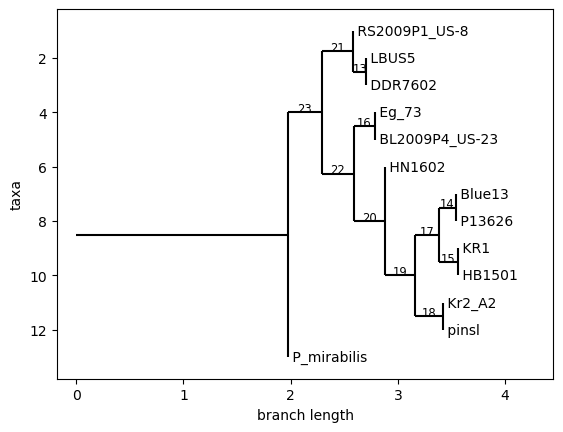

In [23]:

# Creamos un objeto StringIO con el árbol en formato Newick
str_io = io.StringIO(arbol_newick)

# Leemos el árbol desde el objeto StringIO
tree = Phylo.read(str_io, "newick")

# Encontrar el clado que contiene la muestra deseada (por ejemplo, "P_mirabilis")
root_clade = None
for clade in tree.find_clades():
    if clade.name is not None and "P_mirabilis" in clade.name:
        root_clade = clade
        break

# Enraizar el árbol en el clado encontrado
if root_clade:
    tree.root_with_outgroup(root_clade)


plt.figure(figsize=(8, 8))  # Tamaño personalizado para el gráfico
plt.suptitle("Maximum likelihood 100k SNPs", fontsize=14)  # Título del gráfico
Phylo.draw(tree, do_show=False)
# Guardamos la figura como una imagen PNG sin fondo
fig.savefig("snp10k_arbol_nei.png", format='png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()

<Figure size 800x800 with 0 Axes>

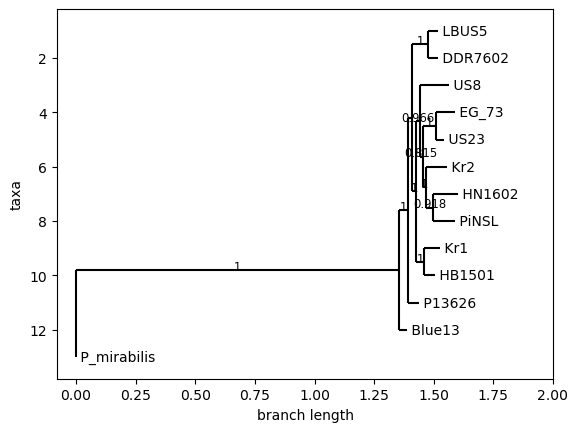

In [28]:
# Creamos un objeto StringIO con el árbol en formato Newick
#str_io = io.StringIO(arbol_newick)

arbol_ML = "((P13626:0.04562079,(Blue13:0.03306318,P_mirabilis:1.35564763)1.000000:0.03685821)1.000000:0.01672294,(LBUS5:0.04145912,DDR7602:0.04367123)1.000000:0.06692686,((US8:0.12141789,((EG_73:0.08266694,US23:0.03395594)1.000000:0.05266923,(Kr2:0.08745908,(HN1602:0.10407518,PiNSL:0.09105225)0.918000:0.02713350)1.000000:0.01432961)0.815000:0.01351778)0.966000:0.01571916,(Kr1:0.06684619,HB1501:0.04349629)1.000000:0.03501855)1.000000:0.01639547);"

str_io = io.StringIO(arbol_ML)

# Encontrar el clado que contiene la muestra deseada (por ejemplo, "P_mirabilis")
root_clade = None
for clade in tree.find_clades():
    if clade.name is not None and "P_mirabilis" in clade.name:
        root_clade = clade
        break

# Enraizar el árbol en el clado encontrado
if root_clade:
    tree.root_with_outgroup(root_clade)


plt.figure(figsize=(8, 8))  # Tamaño personalizado para el gráfico
plt.suptitle("Maximum likelihood 100k SNPs", fontsize=14)  # Título del gráfico
Phylo.draw(tree, do_show=False)
# Guardamos la figura como una imagen PNG sin fondo
fig.savefig("snp100k_arbol_ML.png", format='png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()